In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the datasets
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Display the first few rows of each dataframe to verify successful loading
dfs = {
    "IMDB Title Ratings": title_ratings.head(),
    "IMDB Title Basics": title_basics.head(),
    "BOM Movie Gross": movie_gross.head(),
    "TN Movie Budgets": movie_budgets.head()
}

dfs


{'IMDB Title Ratings':        tconst  averagerating  numvotes
 0  tt10356526            8.3        31
 1  tt10384606            8.9       559
 2   tt1042974            6.4        20
 3   tt1043726            4.2     50352
 4   tt1060240            6.5        21,
 'IMDB Title Basics':       tconst                    primary_title              original_title  \
 0  tt0063540                        Sunghursh                   Sunghursh   
 1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
 2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
 3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
 4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
 
    start_year  runtime_minutes                genres  
 0        2013            175.0    Action,Crime,Drama  
 1        2019            114.0       Biography,Drama  
 2        2018            122.0                 Drama  
 3        2018        

In [3]:
# Merging IMDB datasets on 'tconst'
imdb_merged = pd.merge(title_basics, title_ratings, on='tconst', how='inner')

# Display the first few rows of the merged dataframe to verify the merge
imdb_merged.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [4]:
# Preparing the datasets for merging by ensuring the title columns are in a consistent format
# Converting all titles to lowercase for a case-insensitive match might help improve the merge accuracy
movie_gross['title_lower'] = movie_gross['title'].str.lower()
movie_budgets['movie_lower'] = movie_budgets['movie'].str.lower()

# Merging on the lowercased titles
merged_budget_gross = pd.merge(movie_gross, movie_budgets, left_on='title_lower', right_on='movie_lower', how='inner')

# Dropping the lowercased title columns used for merging to clean up the DataFrame
merged_budget_gross.drop(columns=['title_lower', 'movie_lower'], inplace=True)

# Display the first few rows of the merged dataframe to verify the merge
merged_budget_gross.head()


,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [5]:
# Cleaning the merged_budget_gross dataset

# 1. Dropping 'domestic_gross_x' and keeping 'domestic_gross_y'
cleaned_budget_gross = merged_budget_gross.drop(columns=['domestic_gross_x'])

# 2. Renaming 'domestic_gross_y' to 'domestic_gross' for clarity
cleaned_budget_gross.rename(columns={'domestic_gross_y': 'domestic_gross'}, inplace=True)

# 3. Ensuring financial figures are in numeric format (removing $ and commas)
cleaned_budget_gross['production_budget'] = cleaned_budget_gross['production_budget'].replace('[\$,]', '', regex=True).astype(float)
cleaned_budget_gross['domestic_gross'] = cleaned_budget_gross['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
cleaned_budget_gross['worldwide_gross'] = cleaned_budget_gross['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# 4. Handling missing values - First, check for any missing values in key columns
missing_values_summary = cleaned_budget_gross.isnull().sum()

missing_values_summary


title                  0
studio                 1
foreign_gross        167
year                   0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [6]:
# Assessing missing values in imdb_merged
imdb_missing_values = imdb_merged.isnull().sum()

# Checking data types for numeric data format verification
imdb_data_types = imdb_merged.dtypes

(imdb_missing_values, imdb_data_types)


(tconst                0
 primary_title         0
 original_title        0
 start_year            0
 runtime_minutes    7620
 genres              804
 averagerating         0
 numvotes              0
 dtype: int64,
 tconst              object
 primary_title       object
 original_title      object
 start_year           int64
 runtime_minutes    float64
 genres              object
 averagerating      float64
 numvotes             int64
 dtype: object)

In [7]:
# Handling missing values and preparing for potential merging

# Option 1: Leave missing values as is, particularly for runtime_minutes and genres
# This approach is chosen to avoid introducing inaccuracies through imputation

# Option 2: Lowercase primary_title for potential merging
imdb_merged['primary_title_lower'] = imdb_merged['primary_title'].str.lower()

# Displaying the first few rows to verify changes
imdb_merged.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_title_lower
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,one day before the rainy season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,the other side of the wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,sabse bada sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,the wandering soap opera


In [8]:
# Calculate the total worldwide gross for each studio
studio_gross_totals = cleaned_budget_gross.groupby('studio')['worldwide_gross'].sum().reset_index()

# Sort by worldwide_gross to find the top 10 studios
top_10_studios = studio_gross_totals.sort_values(by='worldwide_gross', ascending=False).head(10)

# Map abbreviated studio names to their full names
studio_name_mapping = {
    "BV": "Disney",
    "WB": "Warner Bros.",
    "Uni.": "Universal",
    "Fox": "20th Century Fox",
    "Sony": "Sony Pictures",
    "Par.": "Paramount Pictures",
    "P/DW": "DreamWorks Animation",
    "Sum.": "Summit Entertainment",
    "LGF": "Lionsgate Films",
    "LG/S": "Lionsgate",
    "WB (NL)": "Warners Bros. New Line"
}

# Apply the mapping
top_10_studios['studio'] = top_10_studios['studio'].map(studio_name_mapping).fillna(top_10_studios['studio'])

# Format worldwide_gross with commas and a dollar sign for readability
top_10_studios['worldwide_gross'] = top_10_studios['worldwide_gross'].apply(lambda x: "${:,.0f}".format(x))

# Select relevant columns for display
top_10_studios = top_10_studios[['studio', 'worldwide_gross']]

# Display the formatted DataFrame
print(top_10_studios)


                    studio  worldwide_gross
15                  Disney  $34,446,855,842
90               Universal  $27,714,016,321
32        20th Century Fox  $27,355,235,415
94            Warner Bros.  $24,263,086,204
82           Sony Pictures  $17,626,365,636
69      Paramount Pictures  $14,466,220,029
95  Warners Bros. New Line   $8,791,297,398
48         Lionsgate Films   $7,081,172,341
64    DreamWorks Animation   $5,078,027,601
47               Lionsgate   $3,957,432,211


In [9]:
from datetime import datetime

# Sample DataFrame loading step
# cleaned_budget_gross = pd.read_csv('path_to_your_dataframe.csv')

# Function to extract season from release date
def get_season(date_str):
    date_obj = datetime.strptime(date_str, "%b %d, %Y")
    month = date_obj.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:  # December, January, February
        return "Winter"

# Applying the season extraction
cleaned_budget_gross['season'] = cleaned_budget_gross['release_date'].apply(get_season)

# Summarizing worldwide gross by season
seasonal_gross = cleaned_budget_gross.groupby('season')['worldwide_gross'].sum().reset_index()

# Formatting the gross numbers for readability
seasonal_gross['formatted_worldwide_gross'] = seasonal_gross['worldwide_gross'].apply(lambda x: "${:,.0f}B".format(x ))

# Sorting the results for a better visualization
seasonal_gross_sorted = seasonal_gross.sort_values(by='worldwide_gross', ascending=False)

# Displaying the formatted results
print(seasonal_gross_sorted[['season', 'formatted_worldwide_gross']])


   season formatted_worldwide_gross
2  Summer          $61,376,475,550B
1  Spring          $46,630,450,767B
0    Fall          $45,576,211,504B
3  Winter          $41,180,621,299B


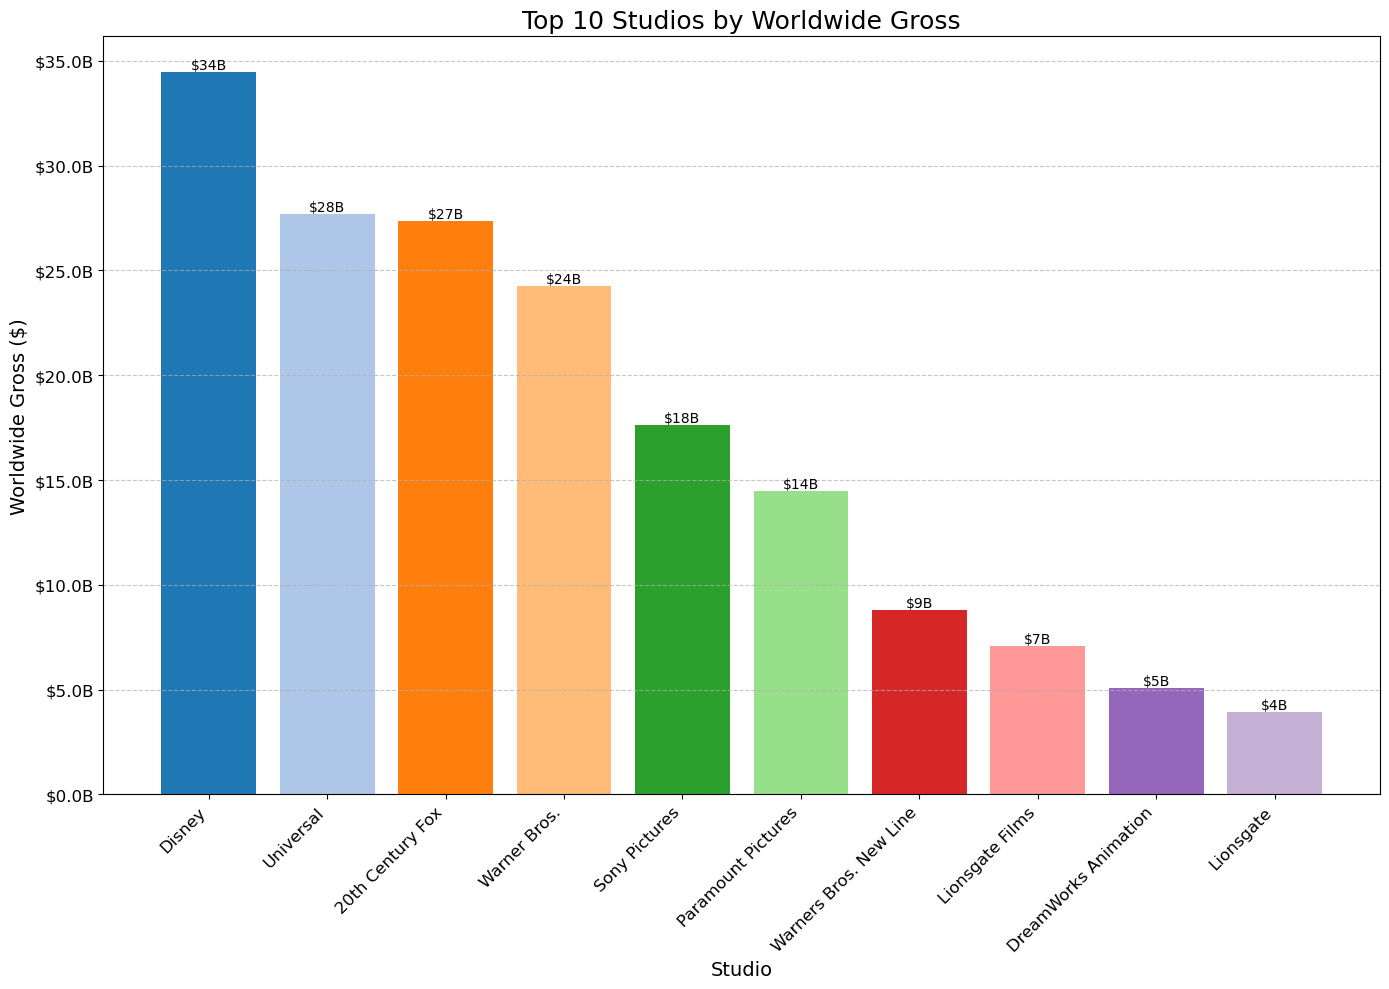

In [10]:
# Calculate the total worldwide gross for each studio
studio_gross_totals = cleaned_budget_gross.groupby('studio')['worldwide_gross'].sum().reset_index()

# Sort by worldwide_gross to find the top 10 studios, descending order
top_10_studios_desc = studio_gross_totals.sort_values(by='worldwide_gross', ascending=False).head(10)

# Apply the mapping
top_10_studios_desc['studio'] = top_10_studios_desc['studio'].map(studio_name_mapping).fillna(top_10_studios_desc['studio'])

# Format worldwide_gross with commas and a dollar sign for readability
top_10_studios_desc['worldwide_gross_formatted'] = top_10_studios_desc['worldwide_gross'].apply(lambda x: "${:,.0f}".format(x))

# Plotting
plt.figure(figsize=(14, 10))
colors = plt.cm.tab20(range(len(top_10_studios_desc)))
bars = plt.bar(top_10_studios_desc['studio'], top_10_studios_desc['worldwide_gross'], color=colors)

# Adding the gross on top of each bar with improved formatting for cleaner look
for bar in bars:
    height = bar.get_height()
    label = "${:,.0f}B".format(height / 1e9)  # Convert to billions for label
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, label, ha='center', va='bottom', fontsize=10)

plt.ylabel('Worldwide Gross ($)', fontsize=14)
plt.xlabel('Studio', fontsize=14)
plt.title('Top 10 Studios by Worldwide Gross', fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}B".format(x / 1e9)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


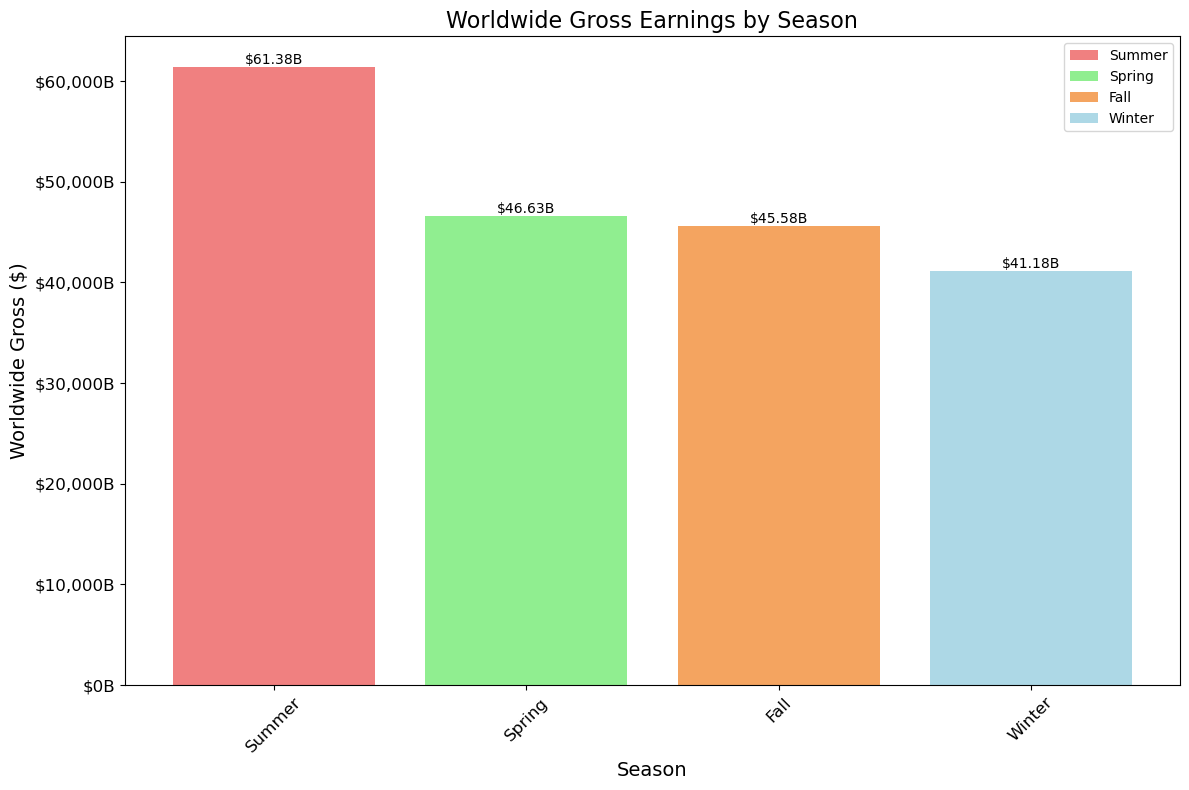

In [11]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sample DataFrame preparation step (replace with your actual data)
# cleaned_budget_gross = pd.read_csv('path_to_your_dataframe.csv') 

# Define a function to determine the season from the release date
def get_season(date_str):
    date_obj = datetime.strptime(date_str, "%b %d, %Y")
    month = date_obj.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"

# Apply the function to assign a season to each movie
cleaned_budget_gross['Season'] = cleaned_budget_gross['release_date'].apply(get_season)

# Aggregate worldwide gross by season
seasonal_gross = cleaned_budget_gross.groupby('Season')['worldwide_gross'].sum().reset_index()

# Sort the seasons in the specified order and assign colors
season_order = ['Summer', 'Spring', 'Fall', 'Winter']
season_colors = ['lightcoral', 'lightgreen', 'sandybrown', 'lightblue']

# Ensure the data is in the correct order
seasonal_gross['Season'] = pd.Categorical(seasonal_gross['Season'], categories=season_order, ordered=True)
seasonal_gross_sorted = seasonal_gross.sort_values('Season')

# Plotting with gross numbers on each bar and ensuring legend is accurate
plt.figure(figsize=(12, 8))

# Plotting each season's bar with a label for the legend
for i, season in enumerate(season_order):
    gross = seasonal_gross_sorted[seasonal_gross_sorted['Season'] == season]['worldwide_gross'].iloc[0]
    bar = plt.bar(season, gross, color=season_colors[i], label=season)
    height = bar[0].get_height()
    plt.text(bar[0].get_x() + bar[0].get_width() / 2., height, f'${height/1e9:.2f}B', ha='center', va='bottom')

plt.title('Worldwide Gross Earnings by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Worldwide Gross ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}B'.format(x/1e6)))

plt.legend()
plt.tight_layout()

plt.show()


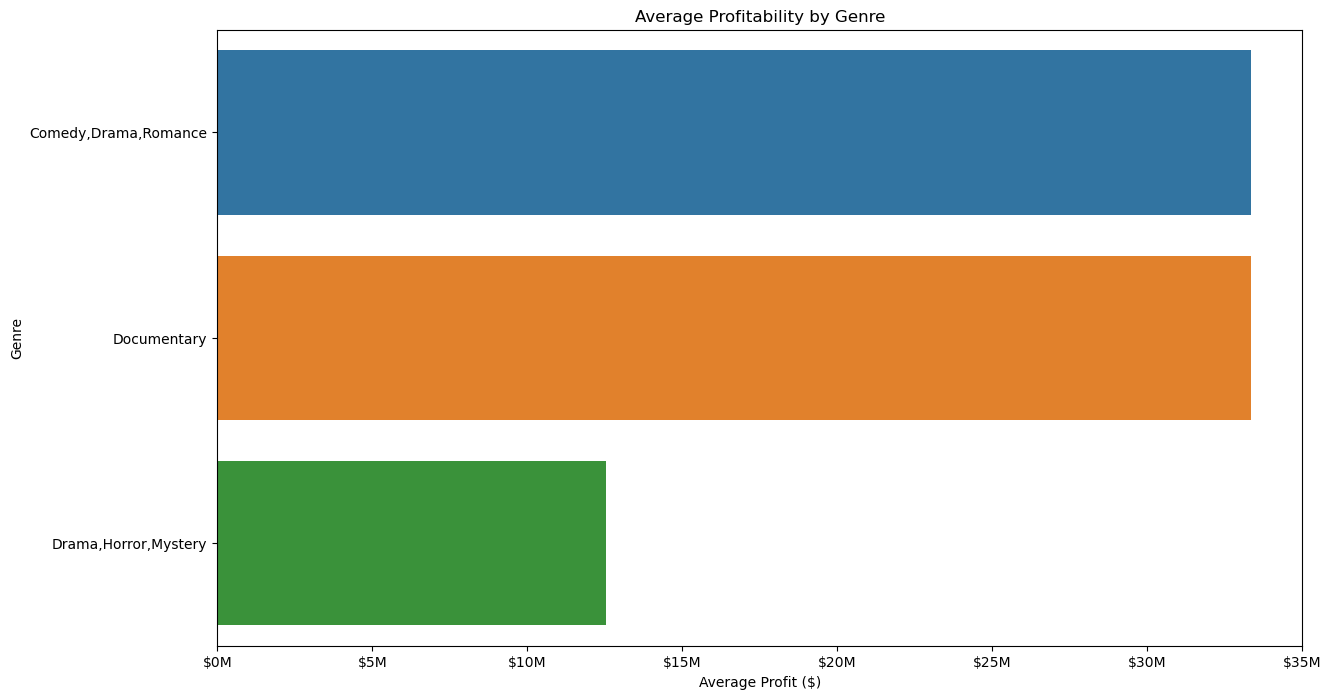

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

final_merged = pd.merge(imdb_merged, cleaned_budget_gross, left_on='primary_title_lower', right_on='movie', how='inner')

# Calculate Profitability
final_merged['profit'] = final_merged['worldwide_gross'] - final_merged['production_budget']

# Prepare genres for analysis
final_merged['genres'] = final_merged['genres'].astype(str).str.split('|')
genres_exploded = final_merged.explode('genres')

# Aggregate Profitability by Genre
genre_profitability = genres_exploded.groupby('genres')['profit'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False).reset_index()

# Function to format x-axis ticks into millions of dollars
def millions_formatter(x, pos):
    return '${:,.0f}M'.format(x / 1e6)

# Visualization: Average Profitability by Genre with formatted x-axis ticks
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='mean', y='genres', data=genre_profitability)
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Average Profitability by Genre')
plt.xlabel('Average Profit ($)')
plt.ylabel('Genre')
plt.show()

